In [159]:
# Data Cleaning and analysis packages
import pandas as pd
import numpy as np


# NLP packages
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize


# Sats and Modeling packages
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

# Visualization packages
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore") 


pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

In [2]:
clean_df = pd.read_csv("data/clean_df.csv", index_col = 0)

In [3]:
clean_df.head(10)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,['Texas winter ready!'],['I bought this last year and am going to buy ...,men's clothing,0,1
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",men's clothing,1,1
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,"['Jeans That Fit Just Right', 'Great jeans wou...","[""If you like Big Men's style wearing jeans th...",men's clothing,1,1
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,"['Committed buyer', 'More Comfortable than Swe...",['My husband loves these jeans and goes throug...,men's clothing,1,1
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,['Saved money and faster delivery that Amazon'...,['Fit well Great price same jeans I was buying...,men's clothing,1,2
5,Champion Men's Powerblend Fleece Pullover Hoodie,22.0,4.6,1247.0,95.0,"['Perfect!', 'Comfy Time', '2020 tie dye trend...",['They were exactly what I was searching for! ...,men's clothing,1,2
6,Fruit of the Loom Men's Core Waffle Thermal Top,5.0,3.3,9.0,100.0,"['Love them', 'Love them - definitely a classi...",['These are very cozy! Body pair for me and my...,men's clothing,1,0
7,Champion Men's Powerblend Graphic Crew,22.5,4.7,377.0,93.0,"['Great sweater and price!', 'A good purchase'...",['I bought 2 of these for $19 each were anothe...,men's clothing,1,2
8,Free Assembly Men's Two-Pocket Flannel Shirt,18.0,4.9,22.0,100.0,"['Washes well. Soft. Good value.', 'Super su...",['My husband also likes this shirt. I washed a...,men's clothing,1,2
9,Lee Men’s Big & Tall Regular Fit Jeans,24.9,4.4,913.0,88.0,"['Great jeans', 'From 501s to Lee Jeans. Best ...",['I have bought Lee jeans for several years. T...,men's clothing,1,1


In [4]:
clean_df.rev_title[4]

'[\'Saved money and faster delivery that Amazon\', \'Very comfortable jeans\', \'Great fit - not too baggy, not too skinny!\', \'Very durable\', \'Pockets are ripped on everyone about eight months\', "Wrangler men\'s relaxed fit jeans", \'Tight in thigh, lighter color in front not solid\', \'Ripped within the first week.\', \'Poor Quality\', \'Mis-manufactured on purpose...STUPID\', \'Bad quality control.\', \'Wrangler jeans. Still the best.\', \'Not What I Wanted\', \'NOT A FAN\', \'Solid. Replaced all my old jeans with these.\', \'These are ok\', \'Good fit\', \'Practical and comfortable at a great price.\', "Wrangler doesn\'t miss", \'How they fit\']'

In [5]:

x = '[\'Saved money and faster delivery that Amazon\', \'Very comfortable jeans\', \'Great fit - not too baggy, not too skinny!\', \'Very durable\', \'Pockets are ripped on everyone about eight months\', "Wrangler men\'s relaxed fit jeans", \'Tight in thigh, lighter color in front not solid\', \'Ripped within the first week.\', \'Poor Quality\', \'Mis-manufactured on purpose...STUPID\', \'Bad quality control.\', \'Wrangler jeans. Still the best.\', \'Not What I Wanted\', \'NOT A FAN\', \'Solid. Replaced all my old jeans with these.\', \'These are ok\', \'Good fit\', \'Practical and comfortable at a great price.\', "Wrangler doesn\'t miss", \'How they fit\']'
' '.join(re.sub("([^0-9A-Za-z])"," ",x).split())

'Saved money and faster delivery that Amazon Very comfortable jeans Great fit not too baggy not too skinny Very durable Pockets are ripped on everyone about eight months Wrangler men s relaxed fit jeans Tight in thigh lighter color in front not solid Ripped within the first week Poor Quality Mis manufactured on purpose STUPID Bad quality control Wrangler jeans Still the best Not What I Wanted NOT A FAN Solid Replaced all my old jeans with these These are ok Good fit Practical and comfortable at a great price Wrangler doesn t miss How they fit'

In [6]:
## all funcitons live in the scripts folder
def clean_text(text):
    text.replace("\\n"," ")
    text =  ' '.join(re.sub("([^A-Za-z])"," ",text).split())
    return text.lower()

In [7]:
clean_df["rev_title"] = clean_df.rev_title.apply(clean_text)

### Now cleaning review_text column

In [8]:
clean_df["review_text"] = clean_df["review_text"].apply(clean_text)

In [9]:
clean_df.review_text[8]

'my husband also likes this shirt i washed and put in dryer before wearing came out almost free of wrinkles no shrinking that he noticed nice soft plaid need more colors the material is super soft and comfortable and the shirt has a good weight to it if i compared it to paper this is the card stock quality got for my husband and he loves it and wears it all the time now great fit soft well made he loves the blue these shirts are a very good quality fits great happily surprised by the high quality of the fabric and make of this shirt soft perfect fit and nice weight perfect for fall and winter super comfy high quality looks great will be ordering more of these shirts great quality fit and design nice quality thick and warm what i thought was a light weight flannel shirt for florida weather i received a thick and heavy flannel jacket a better description is necessary ordered a couple of free assembly flannels and am really pleased with what i received for the price point the design sense

In [10]:
clean_df.head(6)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,men's clothing,1,1
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,jeans that fit just right great jeans would bu...,if you like big men s style wearing jeans thes...,men's clothing,1,1
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,committed buyer more comfortable than sweatpan...,my husband loves these jeans and goes through ...,men's clothing,1,1
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,saved money and faster delivery that amazon ve...,fit well great price same jeans i was buying o...,men's clothing,1,2
5,Champion Men's Powerblend Fleece Pullover Hoodie,22.0,4.6,1247.0,95.0,perfect comfy time tie dye trend online order ...,they were exactly what i was searching for nic...,men's clothing,1,2


# All text is now clean and ready to be used for feature engineering. 
Preprocessing steps:
- Tokenize and Lemmatize
- indentify stopwords
- Create a bag of words
- Textblob (subjectivity/polarity score)
- TfidfVectorizer # can be done right before train test split

In [11]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stop_words=list(set(stopwords.words("english")))

In [12]:
def tokenize(text):
    return nltk.word_tokenize(text)

In [14]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

In [13]:
def lemmatize_text(text):
     return [lemmatizer.lemmatize(word) for word in text]

In [15]:
def fdist(df, column):
    corpus = " ".join([" ".join(text) for text in df[column].to_list()])
    corpus = tokenize(corpus)
    fdist=FreqDist(corpus)
    print(f"Number of words in corpus: {len(fdist)}")
    fdist.plot(20);

In [16]:
clean_df["tokenized"] = clean_df.review_text.apply(tokenize)

Number of words in corpus: 10290


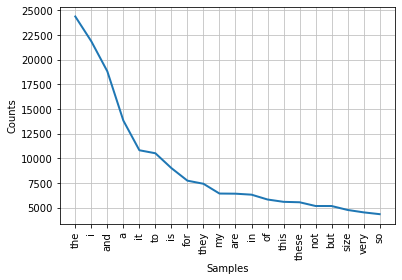

In [17]:
fdist(clean_df, "tokenized")

In [18]:
clean_df["rem_stop"] = clean_df.tokenized.apply(remove_stopwords)

Number of words in corpus: 10143


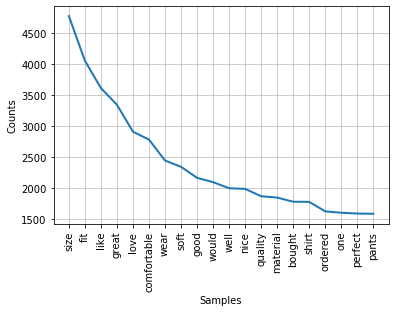

In [19]:
fdist(clean_df, "rem_stop")

In [20]:
clean_df["lemma_words"] = clean_df.rem_stop.apply(lemmatize_text)

Number of words in corpus: 9083


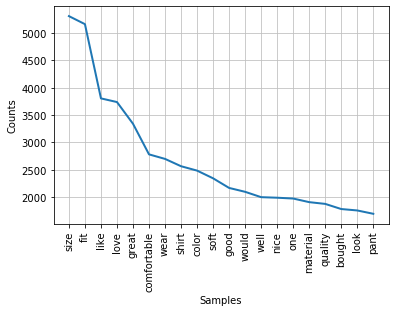

In [21]:
fdist(clean_df, "lemma_words")

In [22]:
clean_df.head()

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid..."
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,men's clothing,1,1,"[i, like, wrangler, the, pants, is, exactly, f...","[like, wrangler, pants, exactly, body, also, g...","[like, wrangler, pant, exactly, body, also, go..."
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,jeans that fit just right great jeans would bu...,if you like big men s style wearing jeans thes...,men's clothing,1,1,"[if, you, like, big, men, s, style, wearing, j...","[like, big, men, style, wearing, jeans, right,...","[like, big, men, style, wearing, jean, right, ..."
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,committed buyer more comfortable than sweatpan...,my husband loves these jeans and goes through ...,men's clothing,1,1,"[my, husband, loves, these, jeans, and, goes, ...","[husband, loves, jeans, goes, quite, lot, thro...","[husband, love, jean, go, quite, lot, througho..."
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,saved money and faster delivery that amazon ve...,fit well great price same jeans i was buying o...,men's clothing,1,2,"[fit, well, great, price, same, jeans, i, was,...","[fit, well, great, price, jeans, buying, amazo...","[fit, well, great, price, jean, buying, amazon..."


In [23]:
no_rec = clean_df[clean_df.target == 0]
yes_rec = clean_df[clean_df.target == 1]

In [24]:
no_rec.head(2)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words
0,Wrangler Men's Unlined Shirt Jacket,12.00,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid..."
10,Eddie Bauer Men's CirrusLite Down Jacket,49.98,4.4,16.0,44.0,don t be fooled by the low price great lightwe...,this jacket has really impressed me it s so li...,men's clothing,0,1,"[this, jacket, has, really, impressed, me, it,...","[jacket, really, impressed, light, like, plast...","[jacket, really, impressed, light, like, plast..."


In [25]:
text = no_rec["lemma_words"].values
text = " ".join(" ".join(word) for word in text)

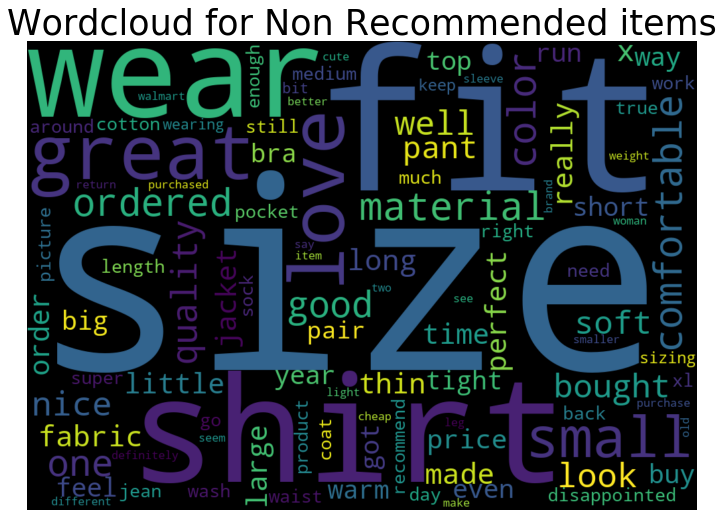

In [26]:
fig, ax = plt.subplots(figsize=(12,17))

wordcloud = WordCloud(max_words=100,collocations=False, width=1000, height=700, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for Non Recommended items", fontsize = 35)
plt.show()

In [27]:
text =yes_rec["lemma_words"].values
text = " ".join(" ".join(word) for word in text)

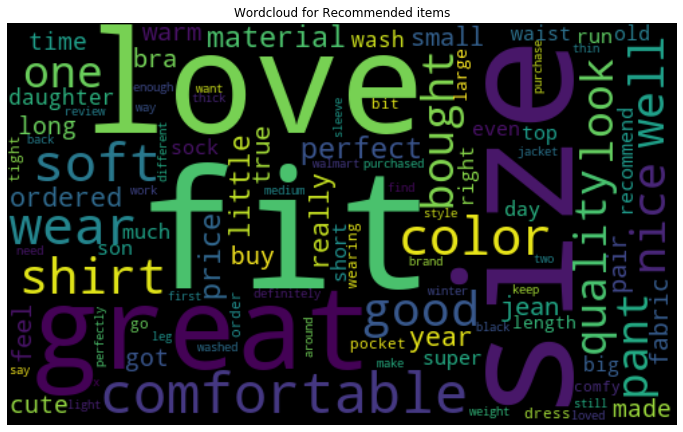

In [28]:
fig, ax = plt.subplots(figsize=(12,17))

wordcloud = WordCloud(max_words=100,collocations=False, width=500, height=300, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for Recommended items")
plt.show()

# Feature Engineering 

In [29]:
eda_stopwords = ["size", "color", "fit",]

In [30]:
stop_words=list(set(stopwords.words("english")))

In [31]:
stop_words.extend(eda_stopwords)

In [32]:
import gensim

In [33]:
clean_df.head()

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid..."
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,men's clothing,1,1,"[i, like, wrangler, the, pants, is, exactly, f...","[like, wrangler, pants, exactly, body, also, g...","[like, wrangler, pant, exactly, body, also, go..."
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,jeans that fit just right great jeans would bu...,if you like big men s style wearing jeans thes...,men's clothing,1,1,"[if, you, like, big, men, s, style, wearing, j...","[like, big, men, style, wearing, jeans, right,...","[like, big, men, style, wearing, jean, right, ..."
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,committed buyer more comfortable than sweatpan...,my husband loves these jeans and goes through ...,men's clothing,1,1,"[my, husband, loves, these, jeans, and, goes, ...","[husband, loves, jeans, goes, quite, lot, thro...","[husband, love, jean, go, quite, lot, througho..."
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,saved money and faster delivery that amazon ve...,fit well great price same jeans i was buying o...,men's clothing,1,2,"[fit, well, great, price, same, jeans, i, was,...","[fit, well, great, price, jeans, buying, amazo...","[fit, well, great, price, jean, buying, amazon..."


In [34]:
#This will tag every unique word in apple_tweets and give it an 'id' number. 
dictionary = gensim.corpora.Dictionary(clean_df["lemma_words"])

In [35]:
#confirming output of the word tags
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10: #only displaying first 10 
        break
print('Total length of word/id pairs: {}'.format(len(dictionary)))

0 another
1 bought
2 buy
3 friday
4 going
5 last
6 perfect
7 texas
8 winter
9 year
10 absolutely
Total length of word/id pairs: 9083


In [36]:
# dictionary is then filtered to remove that appear in more than 50% 
dictionary.filter_extremes(no_above=0.5)

In [37]:
# applying the dictionary to the apple tweets to create a sparce matrix/vector (BOW)
bag_of_words = [dictionary.doc2bow(doc) for doc in clean_df["lemma_words"]]

In [38]:
clean_df.head(2)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid..."
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,men's clothing,1,1,"[i, like, wrangler, the, pants, is, exactly, f...","[like, wrangler, pants, exactly, body, also, g...","[like, wrangler, pant, exactly, body, also, go..."


In [ ]:
clean_df["lemma_words"]

In [152]:
bag_of_words[5]

[(0, 1),
 (1, 3),
 (3, 2),
 (13, 1),
 (28, 2),
 (30, 2),
 (31, 1),
 (32, 1),
 (33, 1),
 (36, 2),
 (47, 3),
 (58, 1),
 (64, 1),
 (70, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (83, 1),
 (87, 1),
 (90, 1),
 (92, 1),
 (93, 1),
 (95, 1),
 (100, 1),
 (103, 1),
 (106, 1),
 (109, 1),
 (110, 1),
 (116, 2),
 (133, 1),
 (135, 1),
 (139, 1),
 (141, 1),
 (148, 1),
 (150, 2),
 (154, 1),
 (157, 1),
 (192, 1),
 (195, 1),
 (204, 1),
 (212, 2),
 (214, 1),
 (221, 1),
 (222, 1),
 (226, 1),
 (227, 8),
 (232, 4),
 (235, 1),
 (238, 1),
 (250, 2),
 (253, 2),
 (260, 3),
 (262, 1),
 (264, 1),
 (271, 2),
 (275, 1),
 (279, 1),
 (282, 2),
 (287, 2),
 (294, 1),
 (302, 2),
 (314, 1),
 (321, 1),
 (323, 1),
 (326, 2),
 (328, 1),
 (334, 2),
 (350, 5),
 (353, 1),
 (358, 1),
 (375, 1),
 (379, 1),
 (380, 1),
 (394, 1),
 (399, 1),
 (406, 1),
 (412, 2),
 (418, 1),
 (421, 1),
 (423, 1),
 (440, 1),
 (449, 2),
 (452, 1),
 (454, 1),
 (455, 1),
 (459, 1),
 (463, 1),
 (467, 1),
 (472, 1),
 (474, 1),
 (479, 3),
 (500, 1),
 (50

In [40]:
def list_to_str(text):
    return ", ".join(text)

In [41]:
clean_df["delisted"] = clean_df["lemma_words"].apply(list_to_str)

In [ ]:
clean_

In [42]:
tfidfconverter = TfidfVectorizer(stop_words = stop_words, ngram_range = (1,1), max_features=1000)  

X = tfidfconverter.fit_transform(clean_df.delisted.values).toarray()

tfidf_df = pd.DataFrame(X)

In [43]:
frames = [clean_df, tfidf_df]

In [79]:
df = pd.concat(frames, axis=1)

In [45]:
df.shape

(1149, 1014)

In [46]:
df.head()

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words,unlisted,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,...,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid...","bought, last, year, going, buy, another, frida...",0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.404064,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.255844,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.287810,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.422333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.303765,0.000000,0.0,0.0,0.0,0.0,0.000000
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,men's clothing,1,1,"[i, like, wrangler, the, pants, is, exactly, f...","[like, wrangler, pants, exactly, body, also, g...","[like, wrangler, pant, exactly, body, also, go...","like, wrangler, pant, exactly, body, also, goo...",0.000000,0.019402,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.074084,0.0,0.0,0.020413,0.0,0.000000,0.000000,0.026625,0.0,0.018313,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.031374,0.0,0.042996,0.0,0.016073,0.067550,0.0,0.000000,0.000000,0.030305,0.0,0

In [125]:
clean_df

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words,unlisted
0,Wrangler Men's Unlined Shirt Jacket,12.00,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid...","bought, last, year, going, buy, another, frida..."
1,Wrangler Men's Relaxed Fit Jeans,12.00,4.5,5840.0,90.0,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,men's clothing,1,1,"[i, like, wrangler, the, pants, is, exactly, f...","[like, wrangler, pants, exactly, body, also, g...","[like, wrangler, pant, exactly, body, also, go...","like, wrangler, pant, exactly, body, also, goo..."
2,Wrangler Big Men's Relaxed Fit Jean,15.00,4.3,3257.0,88.0,jeans that fit just right great jeans would bu...,if you like big men s style wearing jeans thes...,men's clothing,1,1,"[if, you, like, big, men, s, style, wearing, j...","[like, big, men, style, wearing, jeans, right,...","[like, big, men, style, wearing, jean, right, ...","like, big, men, style, wearing, jean, right, w..."
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.00,4.5,259.0,91.0,committed buyer more comfortable than sweatpan...,my husband loves these jeans and goes through ...,men's clothing,1,1,"[my, husband, loves, these, jeans, and, goes, ...","[husband, loves, jeans, goes, quite, lot, thro...","[husband, love, jean, go, quite, lot, througho...","husband, love, jean, go, quite, lot, throughou..."
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.00,4.6,1490.0,91.0,saved money and faster delivery that amazon ve...,fit well great price same jeans i was buying o...,men's clothing,1,2,"[fit, well, great, price, same, jeans, i, was,...","[fit, well, great, price, jeans, buying, amazo...","[fit, well, great, price, jean, buying, amazon...","fit, well, great, price, jean, buying, amazon,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,"dELiA*s Girls Pajama Set, 2-Piece, Sizes 7-16",17.60,4.4,8.0,75.0,no title,this was very small the was way too little for...,girl's clothing,0,1,"[this, was, very, small, the, was, way, too, l...","[small, way, little, average, size, year, old,...","[small, way, little, average, size, year, old,...","small, way, little, average, size, year, old, ..."
1145,Toddler Kids Baby Girls Outfit Floral Top Blou...,15.99,2.5,6.0,40.0,go up a size,make sure to go up a size shirt runs small pan...,girl's clothing,0,0,"[make, sure, to, go, up, a, size, shirt, runs,...","[make, sure, go, size, shirt, runs, small, pan...","[make, sure, go, size, shirt, run, small, pant...","make, sure, go, size, shirt, run, small, pant,..."
1146,Child of Mine by Carter's Baby & Toddler Girls...,12.94,4.8,6.0,100.0,i wish it came in adult sizes very cute adorab...,this is the cutest outfit the top is a little ...,girl's clothing,1,2,"[this, is, the, cutest, outfit, the, top, is, ...","[cutest, outfit, top, little, thicker, tshirt,...","[cutest, outfit, top, little, thicker, tshirt,...","cutest, outfit, top, little, thicker, tshirt, ..."
1147,Wonder Nation Girls Plush Full-Zip Jacket with...,12.00,4.4,28.0,90.0,nice plush jacket fluffy hoodie so soft win wi...,a nice plush jacket for a young girl it is a n...,girl's clothing,1,1,"[a, nice, plush, jacket, for, a, young, girl, ...","[nice, plush, jacket, young, girl, nice, weigh...","[nice, plush, jacket, young, girl, nice, weigh...","nice, plush, jacket, young, girl, nice, weight..."


In [47]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [48]:
# label_encoder = LabelEncoder()
# hot_encoder = OneHotEncoder()

In [49]:
#clean_df["section"] = label_encoder.fit_transform(clean_df["section"])

In [50]:
#clean_df = hot_encoder.fit_transform(clean_df).toarray()

In [51]:
#clean_df = hot_encoder.fit_transform(clean_df)

In [52]:
df.head(2)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words,unlisted,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,...,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid...","bought, last, year, going, buy, another, frida...",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.404064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.255844,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.287810,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.422333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.303765,0.0,0.0,0.0,0.0,0.0,0.000000
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,men's clothing,1,1,"[i, like, wrangler, the, pants, is, exactly, f...","[like, wrangler, pants, exactly, body, also, g...","[like, wrangler, pant, exactly, body, also, go...","like, wrangler, pant, exactly, body, also, goo...",0.0,0.019402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074084,0.0,0.0,0.020413,0.0,0.0,0.0,0.026625,0.0,0.018313,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031374,0.0,0.042996,0.0,0.016073,0.06755,0.0,0.0,0.0,0.030305,0.0,0.0,0.0,0.0,0.016479,0.0,0.0,0.0,0.0,0.0,0.027694,0.033448,0.0,0.0,0.0,0.0,0.026583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016724,0.0,0.0,0.0,0.0,0.0,0.018929,0.0,0.0,0.02116,0.022667,0.0,0.0,0.0,0.0,0.0,0.0,0.011285,0.0,0.0,0.0,0.0,0.0,0.051651,0.0,0.0,0.0,0.0,0.0,0.0,0.033234,0.0,0.0,0.0,0.0,0.0,0.0,0.012695,0.038292,0.0,0.017641,0.0,0.0,0

# Train Test Split

In [126]:
drop_features = ["item_name", "rating_bin", "recommend", "rev_title", "review_text", "section", "tokenized", "rem_stop", "lemma_words", "unlisted", "target"]

In [138]:
X = df.drop(columns = drop_features)
y = df["target"]

In [120]:
clean_df.head(2)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words,unlisted
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid...","bought, last, year, going, buy, another, frida..."
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,men's clothing,1,1,"[i, like, wrangler, the, pants, is, exactly, f...","[like, wrangler, pants, exactly, body, also, g...","[like, wrangler, pant, exactly, body, also, go...","like, wrangler, pant, exactly, body, also, goo..."


In [129]:
# X = clean_df.drop(columns = drop_features)
# y = clean_df.target

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [140]:
print(X_train.shape, y_train.shape)

(804, 1003) (804,)


In [141]:
X_train.head()

,price,overall_rating,num_rating,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,...,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
190,46.26,0.0,525.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.049601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069467,0.0,0.0,0.0,0.0,0.075854,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.090055,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.042251,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.02851,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.062220,0.064145,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.07022,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.106086,0.0,0.0,...,0.0,0.0,0.0,0.058591,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.034257,0.0,0.0,0.0,0.0,0.0,0.000000,0.040764,0.0,0.0,0.0,0.0,0.0,0.032172,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047975,0.0,0.0,0.0,0.0,0.053986,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.095027,0.000000,0.081107,0.0,0.0,0.072204,0.000000,0.0,0.048289,0.0,0.00000,0.037427,0.084469,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.194478,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.094126,0.0,0.0,0.0,0.0,0.049016,0.000000,0.000000,0.0,0.000000,0.128147,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.067701,0.0,0.050471,0.0,0.000000,0.0,0.0
969,15.48,4.7,17.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.259312,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.192624,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.191879,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0

In [167]:
Multi_nb = MultinomialNB()
Multi_nb.fit(X_train, y_train)

MultinomialNB()

In [168]:
y_pred_NB = Multi_nb.predict(X_test)
multi_NB_cm = confusion_matrix(y_test, y_pred_NB)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_NB))
print("-"*60)                         
print(classification_report(y_test, y_pred_NB))

Accuracy is: 0.6985507246376812
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.43      0.24      0.31        96
           1       0.75      0.88      0.81       249

    accuracy                           0.70       345
   macro avg       0.59      0.56      0.56       345
weighted avg       0.66      0.70      0.67       345



In [171]:
B_nb = BernoulliNB(alpha=0.1)
B_nb.fit(X_train, y_train)

BernoulliNB(alpha=0.1)

In [172]:
y_pred_Bnb = B_nb.predict(X_test)
BNB_cm = confusion_matrix(y_test, y_pred_Bnb)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_Bnb))
print("-"*60)                         
print(classification_report(y_test, y_pred_Bnb))

Accuracy is: 0.7072463768115942
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.51      0.49        96
           1       0.81      0.78      0.79       249

    accuracy                           0.71       345
   macro avg       0.64      0.65      0.64       345
weighted avg       0.71      0.71      0.71       345



In [163]:
G_nb = GaussianNB()
G_nb.fit(X_train, y_train)

GaussianNB()

In [174]:
y_pred_Gnb = G_nb.predict(X_test)
GNB_cm = confusion_matrix(y_test, y_pred_Gnb)
print(GNB_cm)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_Gnb))
print("-"*60)                         
print(classification_report(y_test, y_pred_Gnb))

[[ 61  35]
 [ 66 183]]
Accuracy is: 0.7072463768115942
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.64      0.55        96
           1       0.84      0.73      0.78       249

    accuracy                           0.71       345
   macro avg       0.66      0.69      0.67       345
weighted avg       0.74      0.71      0.72       345



In [ ]:
BernoulliNB, GaussianNB

In [142]:
rfc_classifier = RandomForestClassifier(n_estimators = 300, criterion = "entropy", random_state = 0)

In [143]:
rfc_classifier.fit(X_train, y_train)
y_pred_RF = rfc_classifier.predict(X_test)
print("F1 score is:", metrics.f1_score(y_test, y_pred_RF))
print("-"*100)                         
print(classification_report(y_test, y_pred_RF))

F1 score is: 0.8798521256931608
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.44      0.56        96
           1       0.82      0.96      0.88       249

    accuracy                           0.81       345
   macro avg       0.80      0.70      0.72       345
weighted avg       0.81      0.81      0.79       345



In [90]:
from sklearn.model_selection import GridSearchCV

In [149]:
rfc = RandomForestClassifier(n_estimators = 300, criterion = "entropy",
                             random_state = 0, verbose=1, n_jobs=-1)

In [150]:
param_dict={'min_samples_leaf':range(1,20,1), 'max_depth': range(20,40,2)}

In [151]:
grid_tree = GridSearchCV(rfc, param_dict, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)


grid_tree.fit(X_train, y_train)
#rfc.fit(X_train_tfidf, y_train_tfidf)

grid_tree_pred = grid_tree.predict(X_test)
print("Accuracy is:", metrics.accuracy_score(y_test, grid_tree_pred))
print("-"*60)                         
print(classification_report(y_test, grid_tree_pred))

Fitting 5 folds for each of 190 candidates, totalling 950 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 950 out of 950 | elapsed:  5.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s


Accuracy is: 0.8173913043478261
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.45      0.58        96
           1       0.82      0.96      0.88       249

    accuracy                           0.82       345
   macro avg       0.81      0.70      0.73       345
weighted avg       0.82      0.82      0.80       345



[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished


In [94]:
print(grid_tree.best_score_)

print(grid_tree.best_params_)

print(grid_tree.best_estimator_)

print(grid_tree.best_estimator_.feature_importances_)

0.8470263975155279
{'max_depth': 17, 'min_samples_leaf': 1}
RandomForestClassifier(criterion='entropy', max_depth=17, n_estimators=200,
                       n_jobs=-1, random_state=0, verbose=1)
[0.00645366 0.10148421 0.00629285 ... 0.00039644 0.0001317  0.00026683]


# Feature importance

In [95]:
d = {'Stats':X.columns,'FI':grid_tree.best_estimator_.feature_importances_}

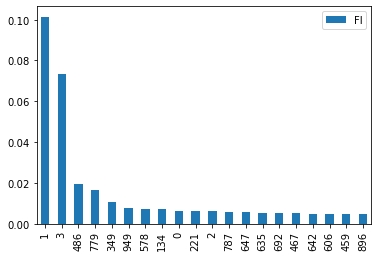

In [96]:
data = pd.DataFrame(d)
data = data.sort_values(by='FI', ascending=0)
data[:20].plot(kind="bar")

In [100]:
feat_imp = data[:10]

In [101]:
feat_imp

,Stats,FI
1,overall_rating,0.101484
3,rating_bin,0.073192
486,482,0.019511
779,775,0.016582
349,345,0.010639
949,945,0.007530
578,574,0.007314
134,130,0.006971
0,price,0.006454
221,217,0.006433


In [103]:
x=feat_imp.Stats
y=feat_imp.FI

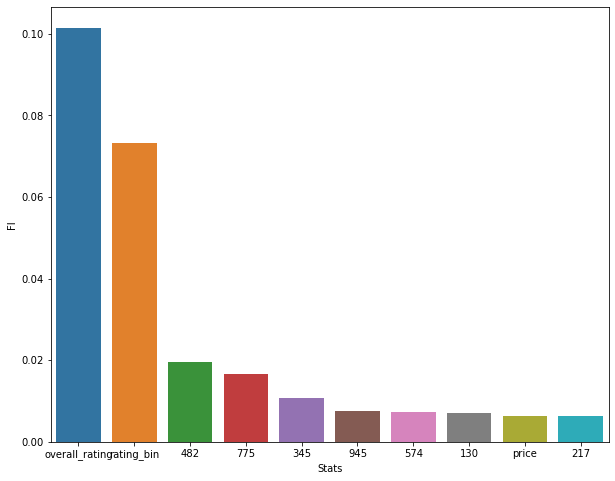

In [104]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=x, y=y, data = feat_imp)

In [107]:
dataset = [d.split() for d in df.unlisted]
vocab = gensim.corpora.Dictionary(dataset)


In [114]:
vocab[217]

'prefer,'

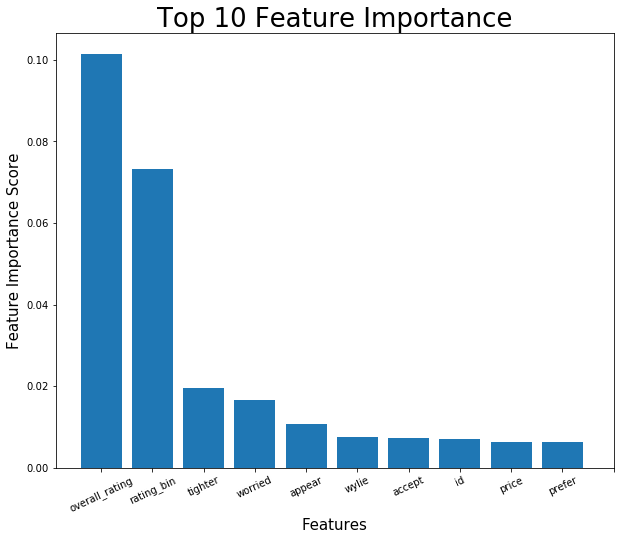

In [117]:
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x=x, height=y, data = feat_imp)

x = ['overall_rating', 'rating_bin', 'tighter', 'worried', 'appear', 'wylie', 'accept', 'id', 'price', 'prefer']
l = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


ax.set_xticks(l)
ax.set_xticklabels(x)
plt.xticks(rotation=25)
plt.title("Top 10 Feature Importance", fontsize=26)
plt.ylabel("Feature Importance Score", fontsize=15)
plt.xlabel("Features", fontsize=15);





In [ ]:
y_pred_DT = dtc_classifier.predict(X_test)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_DT))
print("-"*60)                         
print(classification_report(y_test, y_pred_DT))

#### figure out/exp class imbalance algos (upsample)
#### change hyperperameters (weight = balanced, try bigrams and trigrams)
#### log reg for coef. (+ or -) 
#### LDA topic modeling



In [155]:
clean_df.head(2)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,tokenized,rem_stop,lemma_words,unlisted
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,texas winter ready,i bought this last year and am going to buy an...,men's clothing,0,1,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid...","bought, last, year, going, buy, another, frida..."
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,men's clothing,1,1,"[i, like, wrangler, the, pants, is, exactly, f...","[like, wrangler, pants, exactly, body, also, g...","[like, wrangler, pant, exactly, body, also, go...","like, wrangler, pant, exactly, body, also, goo..."


In [ ]:
doc2vec
word2vec
mean vectors 

SVM models 


In [ ]:
#clean_df.to_csv("data/full_clean_df.csv")